<b>Описание проекта</b>


Основная задача - выявить закономерности в продажах игр и их связь с оценками пользователей и экспертов, жанрами и игровыми платформами. Доступны данные за 2016 год.

<b>Шаг 1. Откройте файл с данными и изучите общую информацию</b>

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('/datasets/games.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


- В столбце Name есть пропуски, и его нужно проверить на дубликаты
- Столбец Platform проверить на дубликаты
- В столбце Year_of_Release есть пропуски
- В Genre есть пропуски и могут быть дубликаты
- В Critic_Score есть пропуски
- В User_Score есть пропуски, и нужно сменить тип на вещественный
- В Rating есть пропуски, нужно проверить на дубликаты

<b>Шаг 2. Подготовьте данные</b>
- Замените названия столбцов (приведите к нижнему регистру);
- Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
- Обработайте пропуски при необходимости.
- Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [2]:
data.columns = data.columns.str.lower()
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Я перевела все названия столбцов в нижний регистр

In [3]:
#Name
display(data[data.name.isnull()])

display(data.duplicated().sum())
display(data.name.value_counts())
data.query('name == "FIFA 14"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


0

Need for Speed: Most Wanted                                       12
Ratatouille                                                        9
LEGO Marvel Super Heroes                                           9
FIFA 14                                                            9
Madden NFL 07                                                      9
                                                                  ..
Phoenix Wright: Revived Turnabout                                  1
Grand Knights History                                              1
Minna de Jibun no Setsumeisho: B-Kata, A-Kata, AB-Kata, O-Kata     1
Guild Wars: Factions                                               1
Azure Striker Gunvolt                                              1
Name: name, Length: 11559, dtype: int64

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
126,FIFA 14,PS3,2013.0,Sports,0.78,4.24,0.07,1.37,86.0,4.3,E
271,FIFA 14,X360,2013.0,Sports,0.92,2.89,0.01,0.40,84.0,4.2,E
469,FIFA 14,PS4,2013.0,Sports,0.61,1.85,0.11,0.44,87.0,6.3,E
1753,FIFA 14,XOne,2013.0,Sports,0.41,0.66,0.00,0.09,88.0,5.8,E
4699,FIFA 14,PSV,2013.0,Sports,0.08,0.23,0.01,0.09,NaN,1.8,E
4809,FIFA 14,PC,2013.0,Sports,0.01,0.36,0.00,0.03,87.0,4.6,E
4985,FIFA 14,Wii,2013.0,Sports,0.00,0.36,0.00,0.02,NaN,4.3,E
6871,FIFA 14,3DS,2013.0,Sports,0.00,0.22,0.00,0.01,NaN,NaN,NaN
7875,FIFA 14,PSP,2013.0,Sports,0.00,0.15,0.00,0.04,NaN,3.4,E


С столбце с названиям игр 2 пропуска, у этих игр есть какие-то продажи, возможно, стоит их в дальнейшем учесть.
Полных дубликатов в таблице нет. В столбце с именами дубликаты соотвестуют выпуску игр на разных платформах или в разные года, так что они не требуют исправления

In [4]:
#Platform
data.platform.value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: platform, dtype: int64

Пропусков в столбце с платформами нет, и дубликатов, похоже, тоже нет

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


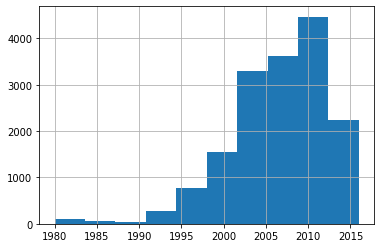

In [5]:
#Year_of_Release
display(data[data.year_of_release.isnull()])

display(data.head())
data['year_of_release'].hist()
data.info()

Довольно много пропусков в столбце с годом выпуска, пока не буду ничего менять

In [6]:
#Genre
display(data[data.genre.isnull()])
display(data.genre.value_counts())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

В столбце с жанрами нет дубликатов, но есть два пропуска - там же, где нет названий игр. Видимо, по этим 2 играм было мало данных, или имеет место ошибка

0.00    4508
0.02     576
0.03     561
0.04     549
0.01     545
        ... 
4.98       1
4.21       1
6.82       1
5.05       1
9.00       1
Name: na_sales, Length: 402, dtype: int64

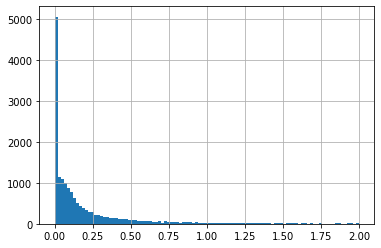

In [7]:
#NA_sales
data.na_sales.hist(bins=100, range=(0, 2))
data.na_sales.value_counts()

0.00    5870
0.01    1494
0.02    1308
0.03     926
0.04     709
        ... 
3.59       1
4.02       1
2.24       1
2.27       1
3.75       1
Name: eu_sales, Length: 307, dtype: int64

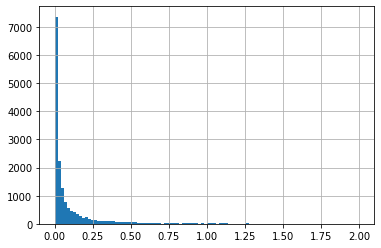

In [8]:
#EU_sales
data.eu_sales.hist(bins=100, range=(0, 2))
data.eu_sales.value_counts()

0.00    10514
0.02      741
0.01      706
0.03      546
0.04      397
        ...  
1.16        1
2.12        1
7.20        1
2.17        1
6.50        1
Name: jp_sales, Length: 244, dtype: int64

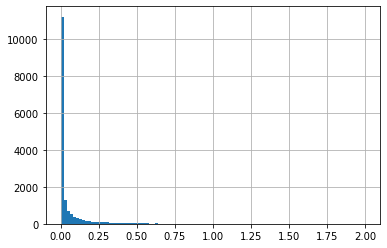

In [9]:
#JP_sales
data.jp_sales.hist(bins=100, range=(0, 2))
data.jp_sales.value_counts()

0.00    6601
0.01    3464
0.02    1618
0.03     926
0.04     654
        ... 
0.96       1
1.93       1
0.97       1
1.37       1
1.06       1
Name: other_sales, Length: 155, dtype: int64

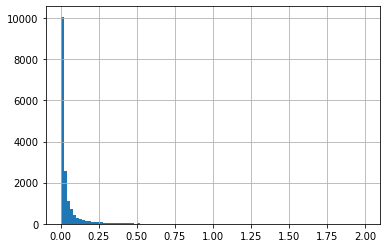

In [10]:
#Other_sales
data.other_sales.hist(bins=100, range=(0, 2))
data.other_sales.value_counts()

По столбцам с продажами:
- данные во всех столбцах выглядят корректными
- больше всего продаж в Америке, и есть большие значения
- дальше идет Европа, потом Япония
- в Японии продажи меньше, но отдельные большие значения тоже встречаются

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


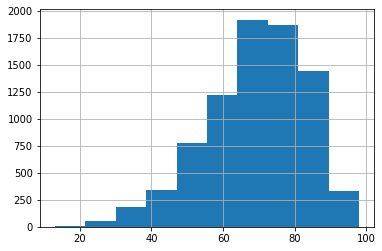

In [11]:
#Critic_Score
display(data[data.critic_score.isnull()])

data.critic_score.hist()

Пропусков много, но нулями или как-то еще я не буду их заполнять, это исказит данные. Гистограмма выглядит правдиво

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


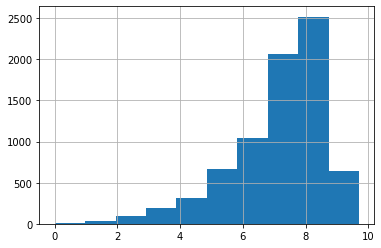

In [12]:
#User_Score
display(data[data.user_score.isnull()])

data.user_score.value_counts()
display(data.query('user_score == "tbd"'))
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')
data.user_score.hist()

Столбец с пользовательским рейтингом:
- tbd значит, что рейтинг будет определен. Заменю это пропусками
- пропусков много, но я не буду их запонять
- перевела данные в вещественный тип

In [13]:
#Rating
display(data[data.rating.isnull()])

data.rating.value_counts()
data.loc[data['rating'] == 'K-A', 'rating'] = 'E10+'
#data.where(data['rating'] != 'K-A', 'E10+') 
data.rating.value_counts()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


E       3990
T       2961
M       1563
E10+    1423
EC         8
RP         3
AO         1
Name: rating, dtype: int64

В столбце с возрастным рейтингом много пропусков, похоже, это те же столбцы, в которых нет пользовательского рейтинга и рейтинга критиков. Заполнить эти данные нечем.

Дубликаты: рейтинг K-A - устаревшее название рейтинга E10+. Больше дубликатов нет

In [14]:
#Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец
import numpy as np
#data['sum_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data['sum_sales'] = np.sum(data.loc[:, 'na_sales': 'other_sales'], axis=1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Суммарные продажи в столбце sum_sales

<b>Шаг 3. Проведите исследовательский анализ данных</b>

<b>3.1</b> Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

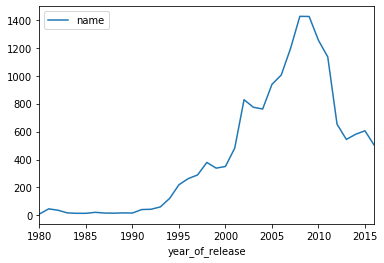

In [15]:
data.pivot_table(index='year_of_release', values='name',
                 aggfunc='count').reset_index().plot(x='year_of_release', y='name')

Я думаю, стоит использовать данные после 2000 года - до этого года игр выходило значительно меньше

<b>3.2</b> Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

,platform,sum_sales
6,WiiU,0.215
5,Wii,0.180
7,X360,0.100
3,PS4,0.085
0,3DS,0.080


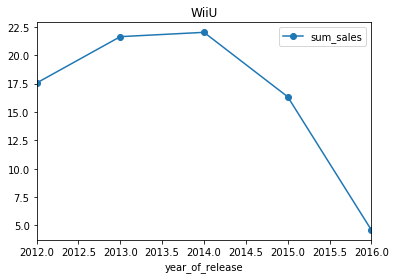

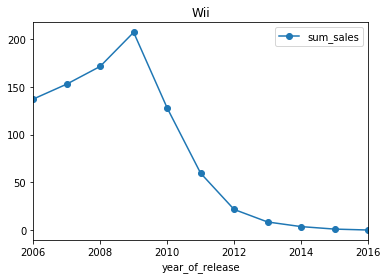

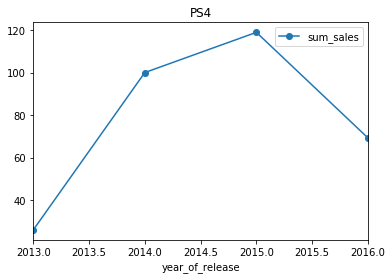

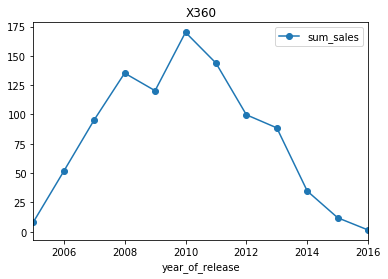

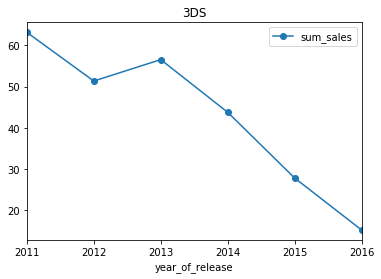

In [16]:
display(data.query('year_of_release == 2016').pivot_table(index='platform', values='sum_sales',
                 aggfunc='median').reset_index().sort_values(by='sum_sales', ascending=False).head())

data.query('platform == "WiiU"').pivot_table(index='year_of_release', values='sum_sales',
                 aggfunc='sum').reset_index().plot(x='year_of_release', y='sum_sales', title='WiiU', style='o-')

data.query('platform == "Wii"').pivot_table(index='year_of_release', values='sum_sales',
                 aggfunc='sum').reset_index().plot(x='year_of_release', y='sum_sales', title='Wii', style='o-')

data.query('platform == "PS4"').pivot_table(index='year_of_release', values='sum_sales',
                 aggfunc='sum').reset_index().plot(x='year_of_release', y='sum_sales', title='PS4', style='o-')

data.query('platform == "X360"').pivot_table(index='year_of_release', values='sum_sales',
                 aggfunc='sum').reset_index().plot(x='year_of_release', y='sum_sales', title='X360', style='o-')

data.query('platform == "3DS"').pivot_table(index='year_of_release', values='sum_sales',
                 aggfunc='sum').reset_index().plot(x='year_of_release', y='sum_sales', title='3DS', style='o-')


Игровые платформы появляются и исчезают в среднем за 10 лет, судя по первым пяти по продажам. Платформа DS имеет одну игру 1985 года, поэтому ее график отличается, но все равно основные продажи происходили примерно с 2004 по 2015

<b>3.3</b> Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывайте в работе данные за предыдущие годы. 

In [17]:
data = data.query('year_of_release >= 2013')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
name               2233 non-null object
platform           2233 non-null object
year_of_release    2233 non-null float64
genre              2233 non-null object
na_sales           2233 non-null float64
eu_sales           2233 non-null float64
jp_sales           2233 non-null float64
other_sales        2233 non-null float64
critic_score       991 non-null float64
user_score         1192 non-null float64
rating             1256 non-null object
sum_sales          2233 non-null float64
dtypes: float64(8), object(4)
memory usage: 226.8+ KB


Я взяла актуальный период - 10 лет. Это среднее время возникновения и популярности новых игровых платформ. И на графике с количеством выпускаемых игр в год на этот период приходится максимум

<b>3.4</b> Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ. Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

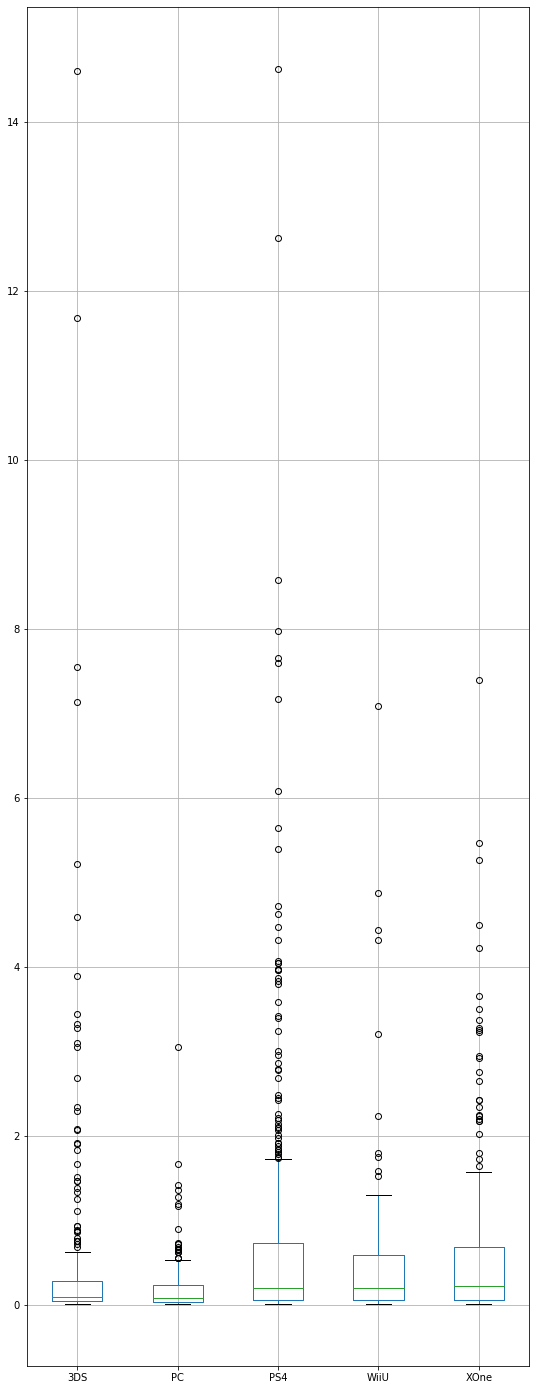

In [18]:
platform_sales = data.query('platform in("PS4", "3DS", "XOne", "PC", "WiiU")').copy().pivot_table(index='name',
                                                                                           columns='platform', values='sum_sales')
platform_sales.boxplot(figsize=(9, 25))

Лидируют по продажам: PS4, 3DS, XOne, PC, WiiU. Хотя эти платформы и все остальные в 2016 году показали уменьшение продаж. Но учитывая общее падение продаж, эти 4 платформы можно считать все еще прибыльными.
Ящик с усами показывает, что набор данных скошен вправо -  то есть, значений, превышающих медиану значительно больше (суммарные продажи по каждой из платформ обычно больше 200 млн)

<b>3.5</b> Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы. Соотнесите выводы с продажами игр на других платформах.

,critic_score,user_score,sum_sales
critic_score,1.000000,0.572802,0.403573
user_score,0.572802,1.000000,-0.030888
sum_sales,0.403573,-0.030888,1.000000


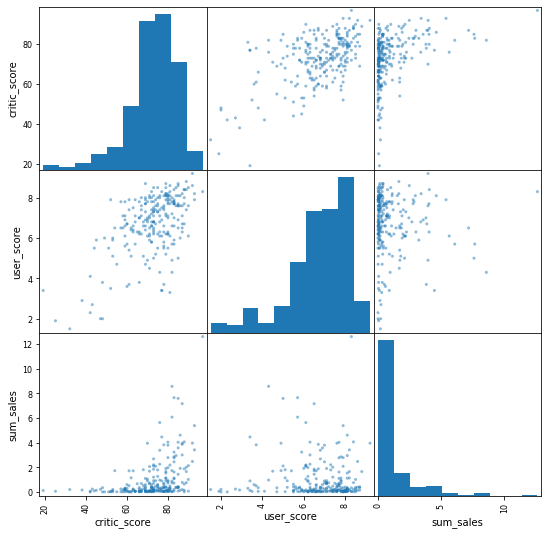

In [19]:
data_ps4 = data.query('platform == "PS4"').dropna()
data_ps4 = data_ps4[['critic_score', 'user_score', 'sum_sales']]

pd.plotting.scatter_matrix(data_ps4, figsize=(9, 9))
data_ps4.corr()

Я взяла платфору PS4, так как она еще популярна и имела достаточно много продаж в течение нескольких лет. Коэффициент корреляции суммарных продаж с оценкой критиков 0.4 - значит, корреляция довольно сильная (чем выше оценка критиков, тем обычно лучше продажи игры). Это видно на матрице рассеяния: игры с большим значением суммарных продаж имеют оценки выше 50, а самые большие продажи соответствуют играм с оценкой выше 80.
Коэффициент корреляции продаж игр с оценкой пользователей -0.03, корреляция слабая и отрицательная. На матрице рассеяния заметно, что игры с большим количеством продаж получали средние оценки.

Я проверю это для платформы 3DS и компьютеров.

,critic_score,user_score,sum_sales
critic_score,1.000000,0.769536,0.339235
user_score,0.769536,1.000000,0.272990
sum_sales,0.339235,0.272990,1.000000


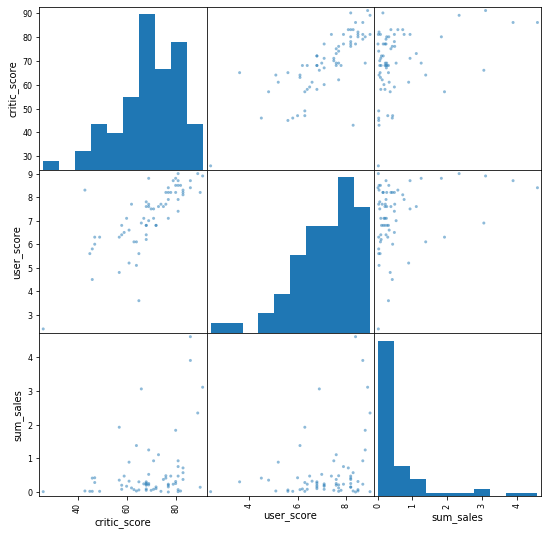

In [20]:
data_3ds = data.query('platform == "3DS"').dropna()
data_3ds = data_3ds[['critic_score', 'user_score', 'sum_sales']]

pd.plotting.scatter_matrix(data_3ds, figsize=(9, 9))
data_3ds.corr()

,critic_score,user_score,sum_sales
critic_score,1.000000,0.474484,0.177174
user_score,0.474484,1.000000,-0.084738
sum_sales,0.177174,-0.084738,1.000000


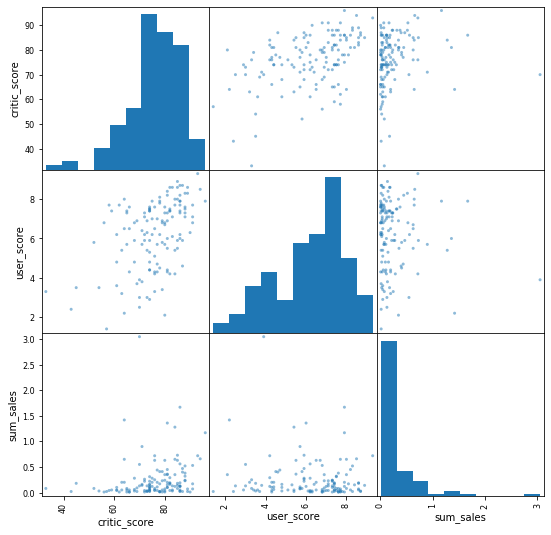

In [21]:
data_pc = data.query('platform == "PC"').dropna()
data_pc = data_pc[['critic_score', 'user_score', 'sum_sales']]

pd.plotting.scatter_matrix(data_pc, figsize=(9, 9))
data_pc.corr()

Я проанализировала так же 3DS и PC. Результаты примерно те же: оценка критиков влияет на продажи игр (чем выше оценка, тем больше продано игр), а оценка пользователей не влияет.

<b>3.6</b> Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

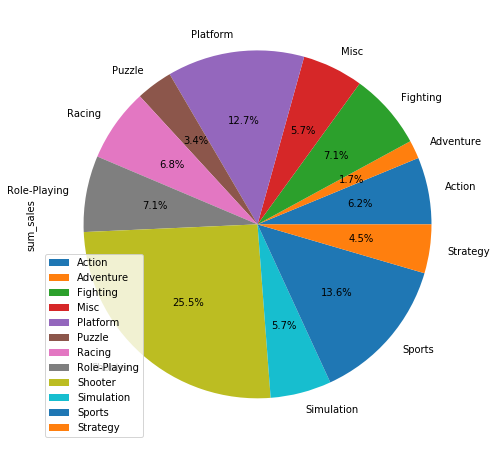

,sum_sales
genre,
Shooter,0.450
Sports,0.240
Platform,0.225
Role-Playing,0.125
Fighting,0.125


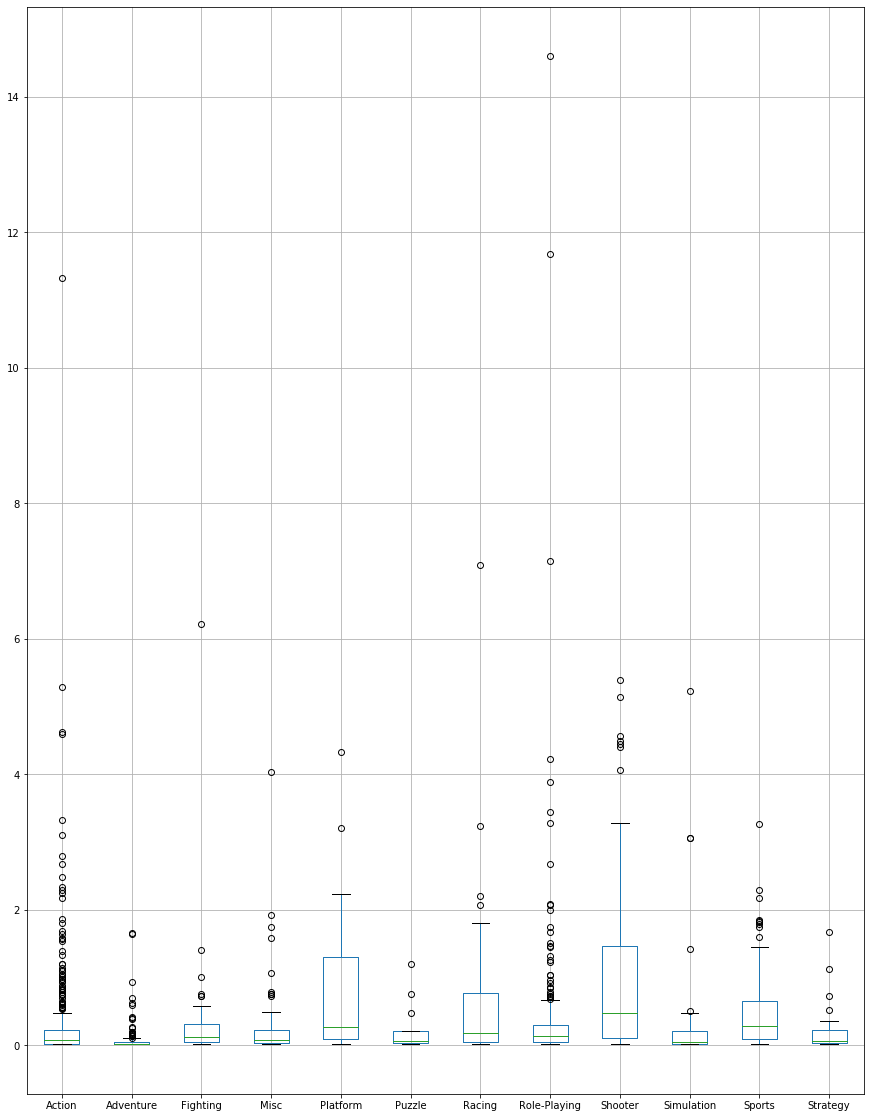

In [22]:
import matplotlib.pyplot as plt

genre = data.pivot_table(index='genre', values='sum_sales',
                 aggfunc='median')
genre.plot(kind='pie', y='sum_sales', figsize=(8,8), autopct='%1.1f%%')
plt.show()
display(genre.sort_values(by='sum_sales', ascending=False).head())
data.pivot_table(index='name', columns='genre', values='sum_sales').boxplot(figsize=(15, 20))

Жанры с самыми высокими продажами: Action, Sports, Shooter

Жанры с самыми низкими продажами: Puzzle, Strategy.

То есть спортивные игры и стрелялки сейчас гораздо более популярны, чем игры на размышления - головоломки и стратегии.
Надо заметить, что 10 лет назад головоломки и стратегии были более популярны.

<b>Шаг 4. Составьте портрет пользователя каждого региона</b>
Определите для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5). Опишите различия в долях продаж.
Самые популярные жанры (топ-5). Поясните разницу.
Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [23]:
display(data.pivot_table(index='platform', values='na_sales',
                           aggfunc='median').sort_values(by='na_sales', ascending=False).head())

display(data.pivot_table(index='platform', values='eu_sales',
                           aggfunc='median').sort_values(by='eu_sales', ascending=False).head())

data.pivot_table(index='platform', values='jp_sales',
                           aggfunc='median').sort_values(by='jp_sales', ascending=False).head()

,na_sales
platform,
X360,0.15
XOne,0.12
WiiU,0.09
PS4,0.06
Wii,0.04


,eu_sales
platform,
Wii,0.100
DS,0.095
PS4,0.080
X360,0.080
WiiU,0.070


,jp_sales
platform,
3DS,0.06
PS3,0.03
PSV,0.03
PSP,0.02
PS4,0.01


Самые популярные платформы в Америке и Европе почти не отличаются: это PS3, X360, Wii. Лидеры самых популярных платформ в Японии совсем другие - DS.
Количество продаж отличаются по регионам пропорционально: в Америке продаж больше всего, в Европе примерно в 2 раза меньше, в Японии - почти в 6.

In [24]:
display(data.pivot_table(index='genre', values='na_sales',
                           aggfunc='median').sort_values(by='na_sales', ascending=False).head())

display(data.pivot_table(index='genre', values='eu_sales',
                           aggfunc='median').sort_values(by='eu_sales', ascending=False).head())

data.pivot_table(index='genre', values='jp_sales',
                           aggfunc='median').sort_values(by='jp_sales', ascending=False).head()

,na_sales
genre,
Shooter,0.200
Platform,0.090
Sports,0.080
Fighting,0.045
Racing,0.030


,eu_sales
genre,
Shooter,0.190
Platform,0.080
Racing,0.060
Sports,0.050
Simulation,0.035


,jp_sales
genre,
Role-Playing,0.05
Fighting,0.03
Misc,0.02
Puzzle,0.02
Action,0.01


Самые популярные жанры в Америке и Европе спорт и экшн, что согласуется с общим распределением по жанрам (Америка по большей части определяет рынок, я думаю). В Японии лидирует ролевая игра, а дальше все примерно как в Америке и Европе.
Японский игровой рынок довольно самобытный.

,eu_sales,jp_sales,na_sales
rating,,,
E,83.36,15.14,79.05
E10+,42.69,5.89,54.24
M,145.32,14.11,165.21
No rating,78.91,85.05,89.42
T,41.95,20.59,49.79


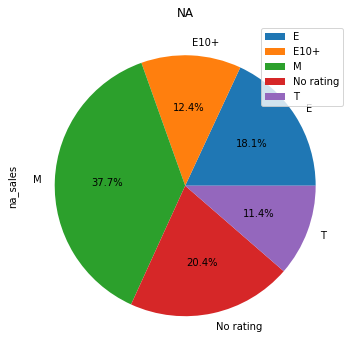

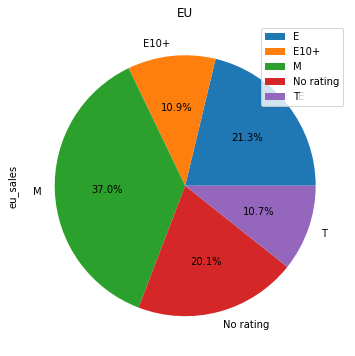

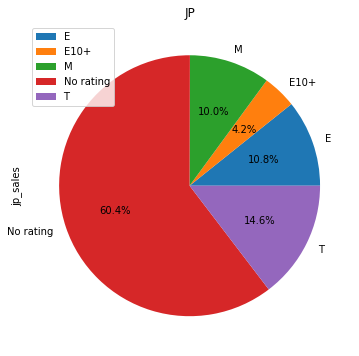

In [25]:
#Влияет ли рейтинг ESRB на продажи в отдельном регионе?
data['rating'] = data['rating'].fillna(value = 'No rating')
rating = data.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
display(rating)
rating.plot(kind='pie', y='na_sales', title='NA', figsize=(6,6), autopct='%1.1f%%')
rating.plot(kind='pie', y='eu_sales', title='EU', figsize=(6,6), autopct='%1.1f%%')
rating.plot(kind='pie', y='jp_sales', title='JP', figsize=(6,6), autopct='%1.1f%%')

Игры с рейтингом Е лучше продаются во всех регионах (этот рейтинг для любого возраста, так что неудивительно). В Японии больше продается игр для подростков, чем в других регионах.

<b>Шаг 5. Проверьте гипотезы</b>
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

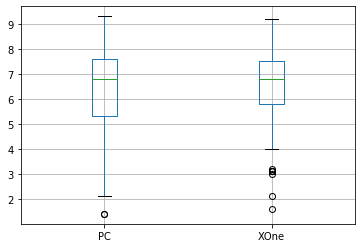

In [26]:
import matplotlib.pyplot as plt

xbox_user_score = data.query('platform == "XOne"')[['user_score']].reset_index(drop=True)
pc_user_score = data.query('platform == "PC"')[['user_score']].reset_index(drop=True)
#xbox_user_score.plot(kind='hist', title='Xbox One')
#pc_user_score.plot(kind='hist', title='PC')
plt.show()

data.query('platform in("XOne", "PC")').pivot_table(index='name',
                                                    columns='platform', values='user_score').boxplot()

xbox_user_score = xbox_user_score.dropna()
pc_user_score = pc_user_score.dropna()

Судя по гистограммам, распределения пользовательских рейтингов различаются, значит выборки не эквивалентны. 

<b>Проверка гипотез</b>

Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Альтернативная гипотеза: Срейдние пользовательские рейтинги отличаются

In [27]:
from scipy import stats as st

alpha = 0.05
r = st.ttest_ind(xbox_user_score, pc_user_score, equal_var=True)
print(r.pvalue)

if r.pvalue < alpha:
    print('Нулевая гипотеза может быть опровергнута')
else:
    print('Нулевую гипотезу нельзя опровергнуть')

[0.14012658]
Нулевую гипотезу нельзя опровергнуть


<b>Вывод</b> Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

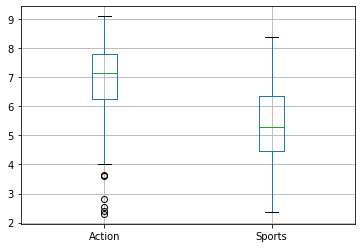

In [28]:
action_user_score = data.query('genre == "Action"')[['user_score']].reset_index(drop=True)
sports_user_score = data.query('genre == "Sports"')[['user_score']].reset_index(drop=True)
#action_user_score.plot(kind='hist', title='Action')
#sports_user_score.plot(kind='hist', title='Sports')

plt.show()

data.query('genre in("Action", "Sports")').pivot_table(index='name',
                                                       columns='genre', values='user_score').boxplot()
action_user_score = action_user_score.dropna()
sports_user_score = sports_user_score.dropna()

Судя по гистограммам, распределения пользовательских рейтингов похожи, значит выборки эквивалентны. 

<b>Проверка гипотез</b>

Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports одинаковые

Альтернативная гипотеза: Срейдние пользовательские рейтинги этих жанров отличаются

In [29]:
alpha = 0.05
r = st.ttest_ind(action_user_score, sports_user_score, equal_var=False)
print(r.pvalue)

if r.pvalue < alpha:
    print('Нулевая гипотеза может быть опровергнута')
else:
    print('Нулевую гипотезу нельзя опровергнуть')

[1.44600397e-20]
Нулевая гипотеза может быть опровергнута


Средние пользовательские рейтинги жанров Action и Sports отличаются

<b>Вывод</b>

В ходе работы были выявлены определяющие успешность игры закономерности при планировании рекламных кампаний на 2017 по данным за 2016 год и раньше.
Последние 4 года были выбраны как актуальный период.
    Выводы:
    
- Лидируют по продажам во всем мире платформы: PS4, WiiU, XOne. Самые популярные платформы - в Америке X360 и XOne, в Европе Wii и DS, в Японии 3DS и PS3 
    
- Жанры с самыми высокими продажами по миру оказались Shooter, Sports, Platform и Role-Playing. Самые популярные жанры в Америке и Европе Shooter и Platform. В Японии лидируют РПГ и драки.
    
- Оценка критиков влияет на продажи игр: игры с большИм значением суммарных продаж имеют оценки выше 50, а самые большие продажи соответствуют играм с оценкой выше 80. Оценка пользователей не влияет на объемы продаж.
    
- В Японии больше половины игр выходят без рейтинга. Среди игр с рейтингом в Японии самыми популярными явяются игры для подростков (Т). Для Америки и Европы больше всего игр продается с рейтингом М (для взрослых).
    
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
    
- Средние пользовательские рейтинги жанров экшен и спорт разные